In [236]:
import matplotlib.pyplot as plt 
import numpy as np
from astropy.io import fits
from crispy import psf

In [343]:
wavelength = 700
wl_ref = 760
fwhm = 2

gauss_psf = psf.GaussianPSF(wavelength, wl_ref, fwhm, n_subpix=13)

In [344]:
gauss_psf.shape

(141, 141)

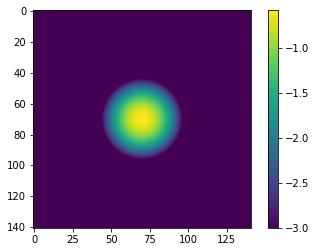

In [361]:
plt.imshow(np.log10(gauss_psf._psf), vmin=-3)
plt.colorbar()

In [355]:
gauss_psf._psf.sum()

99.99999999999999

In [356]:
y, x = np.indices((13,13)) - 13//2 


In [357]:
y_det.dtype

dtype('float64')

False
1.0000199137904509


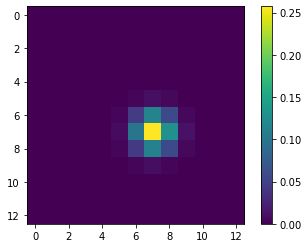

In [388]:
upsample = 10
npix = 13


ycen, xcen = np.random.uniform(100, 900, size=2)


y_det, x_det = np.indices((1024+npix,1024+npix)).astype(np.float64)

iy1 = int(ycen) - npix//2
iy2 = iy1 + npix 

ix1 = int(xcen) - npix//2
ix2 = ix1 + npix 


y_new = (y_det[iy1:iy2, ix1:ix2] - ycen) * upsample + upsample * float(npix) / 2. 
x_new = (x_det[iy1:iy2, ix1:ix2] - xcen) * upsample + upsample * float(npix) / 2. 

psflet = gauss_psf.map_psf([y_new,x_new]) 
print(np.any(psflet<0))
plt.imshow(psflet)
plt.colorbar()

print(psflet.sum())

In [377]:
# Initializing value of x-axis and y-axis
# in the range -1 to 1
x, y = np.meshgrid(np.linspace(-10,10,141+1), np.linspace(-10,10,141+1))
dst = np.sqrt(x*x+y*y)
  
# Intializing sigma and muu
sigma = 1
muu = 0.000
  
# Calculating Gaussian array
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
gauss /= gauss.sum()
  
print("2D Gaussian array :\n")
print(gauss.sum())

2D Gaussian array :

1.0000000000000002


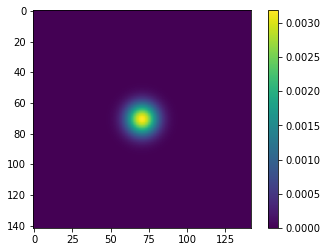

In [235]:
plt.imshow(gauss)
plt.colorbar()

In [238]:
psf_charis = fits.getdata(r"C:\Users\tbain\Downloads\hires_psflets_lam1450.fits")

In [239]:
psf_charis.shape

(5, 5, 126, 126)

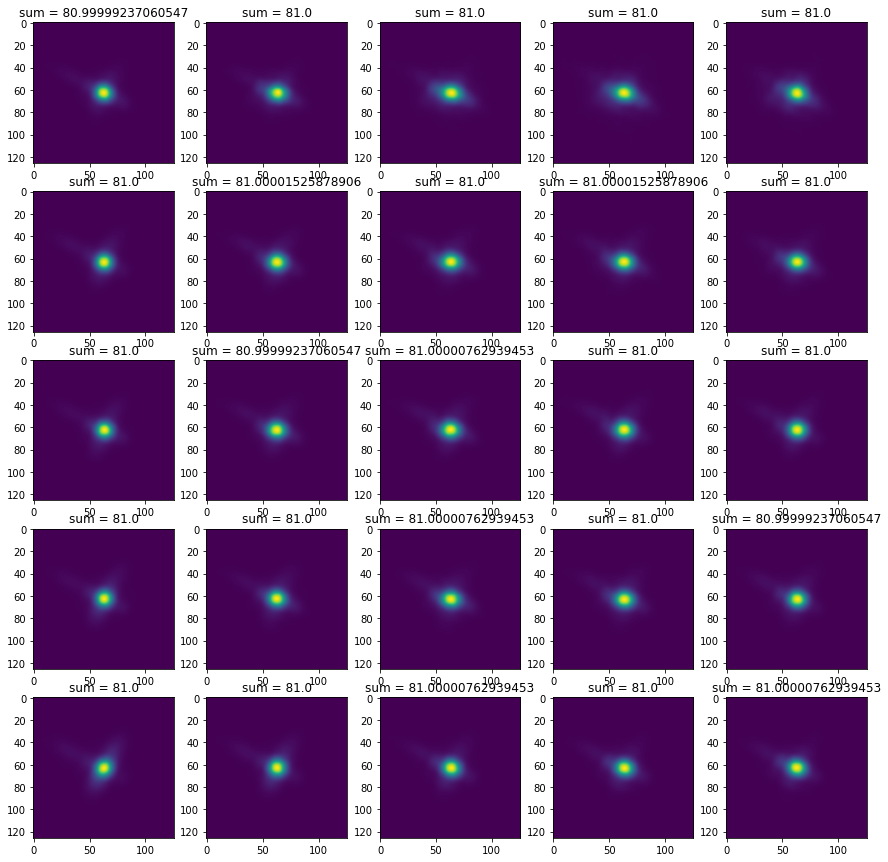

In [247]:
fig, axes = plt.subplots(5,5, figsize=(15,15))

for i, ax in enumerate(axes.ravel()):
    psf_ = psf_charis.reshape(-1, *psf_charis.shape[2:])[i]
    ax.imshow(psf_)
    ax.set_title(f"sum = {psf_.sum()}")

In [270]:
dlam = np.abs(600 - 610)
dlam / (600/50)

0.8333333333333334

In [271]:
(836-684) / (684/150)

33.333333333333336